Last modified: Sept 1st, 2025

## Oblique electrostatic waves
#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [18]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../../../../')))

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.obliqueQLT import dispersion_relation

In [20]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

### Oblique electrostatic waves: low anisotropy setup 

In [21]:
# parameters from 2021 paper 
# normalization (Vadim parameters)
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
omega_0 = 0.5 # Omega_ce
omega_pe = 4 # Omgea_{ce}

n_c = 0.8 # n^e_0

# thermal velocity 
alpha_c_perp = 0.0079 # d_e x Omega_ce
alpha_c_par = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_c_perp / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_c_perp # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

In [22]:
ky = 11
kz = ky*np.sqrt((omega_0**2)/ (1-omega_0**2))
print("k = ", np.sqrt(ky**2 + kz**2))

sol = scipy.optimize.newton(dispersion_relation(k_perp=ky, k_par=kz, omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0,
                                                v_0=v_0, alpha_i=alpha_i, alpha_c_par=alpha_c_par,
                                                alpha_c_perp=alpha_c_perp, n_c=n_c), omega_0+1e-3j, tol=1e-15)

print("omega_k + i gamma = ", sol)
print("dispersion residual = ", abs(dispersion_relation(k_perp=ky, k_par=kz, omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0,
                                                v_0=v_0, alpha_i=alpha_i, alpha_c_par=alpha_c_par,
                                                alpha_c_perp=alpha_c_perp, n_c=n_c)(sol)))

k =  12.701705922171765
omega_k + i gamma =  (0.49133499455331203+0.003528395311648414j)
dispersion residual =  4.8328242560506193e-11


In [23]:
ky_ = np.linspace(5, 62, 50)
kz_ = np.sqrt((omega_0**2) / (1-omega_0**2))*ky_
sol_ = np.zeros((len(ky_)), dtype="complex128")
k_abs = np.zeros((len(ky_)))

In [24]:
for ii in range(len(ky_)):
    try:
        k_abs[ii] = np.sqrt(ky_[ii]**2 + kz_[ii]**2)
        sol_[ii] = scipy.optimize.newton(dispersion_relation(k_perp=ky_[ii], k_par=kz_[ii], omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0,
                                                v_0=v_0, alpha_i=alpha_i, alpha_c_par=alpha_c_par,
                                                alpha_c_perp=alpha_c_perp, n_c=n_c), omega_0 + 1e-4j, tol=1e-15)
        error = abs(dispersion_relation(k_perp=ky_[ii], k_par=kz_[ii], omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0,
                                                v_0=v_0, alpha_i=alpha_i, alpha_c_par=alpha_c_par,
                                                alpha_c_perp=alpha_c_perp, n_c=n_c)(sol_[ii]))
        #print("dispersion residual = ", error)
        if error > 1e-8:
            sol_[ii] =  np.inf + np.inf*1j
    except:
        sol_[ii] =  np.inf + np.inf*1j
        print("An exception occurred")

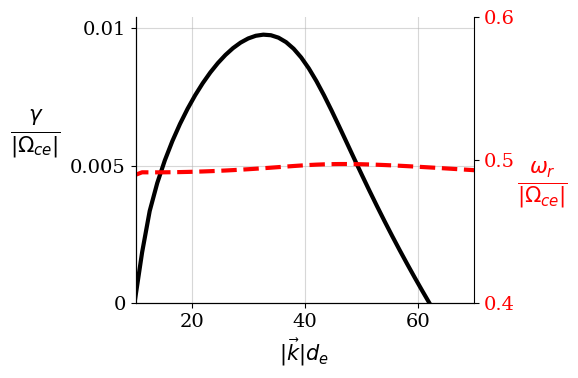

In [26]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot on the left y-axis (ax1)
ax1.plot(k_abs, sol_.imag, color="black", linewidth=3)
ax1.set_xlabel(r"$|\vec{k}|d_{e}$ ", fontsize=15)
ax1.set_ylabel(r"$\gamma$", fontsize=17, color="black")
ax1.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', fontsize=22, labelpad=25, rotation=0, color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticks([0, 0.005, 0.01])
ax1.set_yticklabels(["0", "0.005", "0.01"])
ax1.set_ylim(0)

# create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(k_abs, sol_.real, color="red", ls="--", linewidth=3)
ax2.set_ylabel(r'$\frac{\omega_r}{|\Omega_{ce}|}$', fontsize=22, labelpad=20, rotation=0, color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.spines['top'].set_visible(False)
ax2.set_yticks([0.4, 0.5, 0.6])
ax1.set_xlim(10, 70)
#ax1.set_xticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


# add grid and layout adjustments
ax1.grid(alpha=0.5)
fig.tight_layout()

# save the combined figure
plt.savefig("../../../../figs/manuscript/w_r_gamma_oblique_dual_axis_low_anisotropy.png", dpi=300, bbox_inches='tight')